# GIS data processing

## Shape files

Load the required modules.

In [20]:
from fiona import collection
import matplotlib.pyplot as plt
%matplotlib inline

Create a fiona collection from the shape files.

In [2]:
input = collection('Data/USA.gdb', 'r')

Check the schema of the shape file.

In [3]:
input.schema

{'geometry': 'MultiPolygon',
 'properties': OrderedDict([('NAME', 'str:110'),
              ('COUNTRY', 'str:20'),
              ('STATEABB', 'str:20'),
              ('Shape_Length', 'float'),
              ('Shape_Area', 'float'),
              ('BORDER', 'int'),
              ('REGION', 'str:20')])}

List the states in the USA.

In [57]:
states = set()
for region in input:
    states.add(region['properties']['NAME'])
print('number of states in US: {0}'.format(len(states)))
print('states: ', end='')
print(*states, sep=', ')

number of states in US: 51
states: California, Vermont, Indiana, Texas, North Carolina, Washington, Alaska, Colorado, Utah, Arizona, Iowa, Wyoming, Tennessee, Rhode Island, Maryland, Illinois, Michigan, Nebraska, Arkansas, Wisconsin, New Jersey, Ohio, Delaware, South Dakota, Kentucky, Idaho, Oregon, Nevada, West Virginia, Hawaii, Georgia, New Mexico, Missouri, Maine, Florida, North Dakota, Massachusetts, Connecticut, District of Columbia, Minnesota, South Carolina, Mississippi, Alabama, Louisiana, New York, Pennsylvania, Virginia, New Hampshire, Montana, Kansas, Oklahoma


Define a function that will return the points that define the polygon for a region.

In [51]:
def get_region(input, n):
    return input[n]['geometry']['coordinates'][0][0]

Plot all regions in the shapefile, this will be a map of the USA.

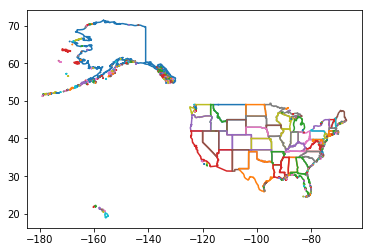

In [52]:
for i in input.keys():
    region = get_region(input, i)
    x = [x[0] for x in region]
    y = [x[1] for x in region]
    plt.plot(x, y)

The bounds of the entire USA are given by an attribute.

In [13]:
input.bounds

(-179.13073424448964,
 18.913788476756963,
 -66.98181454720344,
 71.39842062001577)

Define a function that plots the state with the given name.

In [53]:
def plot_state(input, name):
    for i in input.keys():
        if input[i]['properties']['NAME'] == name:
            region = get_region(input, i)
            x = [x[0] for x in region]
            y = [x[1] for x in region]
            plt.plot(x, y)

Plot Florida's outline.

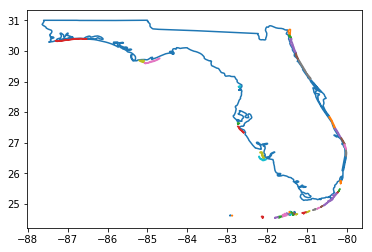

In [55]:
plot_state(input, 'Florida')

## Creating GIS data

Load the required modules.

In [1]:
from shapely.geometry import Point, LinearRing, Polygon, LineString, MultiPolygon

Create a simple polygon, represented as a `Polygon`.  This shape could also be represented as a `LinearRing`.

In [2]:
polygon1 = Polygon([(1.0, 1.0), (1.0, 3.0), (3.0, 2.0), (3.0, 1.0)])

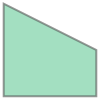

In [3]:
polygon1

In [4]:
polygon1.wkt

'POLYGON ((1 1, 1 3, 3 2, 3 1, 1 1))'

Create a second polygon with a hole.

In [5]:
polygon2 = Polygon([(1.5, 1.5), (1.5, 4.0), (4.5, 3.0), (4.5, 1.0)],
                   [[(2.0, 2.0), (2.5, 2.5), (2.8, 2.0)]])

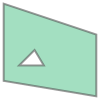

In [6]:
polygon2

Compute the area of the polygon.

In [7]:
polygon2.area

6.55

Compute the intersection between the two polygons.

In [8]:
intersection = polygon1.intersection(polygon2)

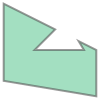

In [9]:
intersection

In [10]:
intersection.wkt

'POLYGON ((1.5 2.75, 2.333333333333333 2.333333333333333, 2 2, 2.8 2, 2.714285714285714 2.142857142857143, 3 2, 3 1.25, 1.5 1.5, 1.5 2.75))'

Compute the union of the two polygons.

In [11]:
union = polygon1.union(polygon2)

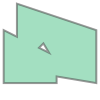

In [12]:
union

In [13]:
union.wkt

'POLYGON ((1 1, 1 3, 1.5 2.75, 1.5 4, 4.5 3, 4.5 1, 3 1.25, 3 1, 1 1), (2.333333333333333 2.333333333333333, 2.714285714285714 2.142857142857143, 2.5 2.5, 2.333333333333333 2.333333333333333))'

Check whether the area of the union is the sum of the areas of the polygons minus the area of their intersection.

In [14]:
polygon1.area + polygon2.area - intersection.area

8.202380952380953

In [15]:
union.area

8.202380952380953

Create a point.

In [16]:
point1 = Point((2.1, 2.1))

Check whether the point lies within the first polygon.

In [17]:
point1.within(polygon1)

True

For the second polygon, the point is within the hole.

In [18]:
point1.within(polygon2)

False

Create a horizontal line.

In [19]:
line1 = LineString([(0.5, 2.1), (5.0, 2.1)])

Compute the intersection between the line and the second polygon.

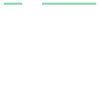

In [20]:
polygon2.intersection(line1)

Check whether the line intersects with the first polygon.

In [21]:
line1.intersects(polygon1)

True

A line can be turned into an object with a finite width by creating a buffer around it of the specifie size. The result is a `Polygon`.

In [22]:
buffer1 = line1.buffer(0.001)

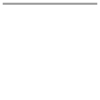

In [23]:
buffer1

In [24]:
buffer1.wkt

'POLYGON ((5 2.101, 5.00009801714033 2.100995184726672, 5.000195090322016 2.100980785280403, 5.000290284677255 2.100956940335732, 5.000382683432365 2.100923879532512, 5.000471396736826 2.100881921264349, 5.000555570233019 2.100831469612303, 5.000634393284163 2.100773010453363, 5.000707106781187 2.100707106781186, 5.000773010453362 2.100634393284164, 5.000831469612303 2.10055557023302, 5.000881921264348 2.100471396736826, 5.000923879532511 2.100382683432365, 5.000956940335732 2.100290284677254, 5.000980785280404 2.100195090322016, 5.000995184726672 2.10009801714033, 5.001 2.1, 5.000995184726672 2.099901982859671, 5.000980785280404 2.099804909677984, 5.000956940335732 2.099709715322746, 5.000923879532511 2.099617316567635, 5.000881921264348 2.099528603263174, 5.000831469612303 2.09944442976698, 5.000773010453362 2.099365606715836, 5.000707106781187 2.099292893218814, 5.000634393284163 2.099226989546637, 5.000555570233019 2.099168530387697, 5.000471396736826 2.099118078735652, 5.000382683

The latter can be used to split a polygon along the line by computing the difference between the polygon and the buffer created out of the line.  The result is a `MultiPolygon`.

In [25]:
split = polygon1.difference(buffer1)

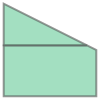

In [26]:
split

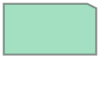

In [27]:
split[0]

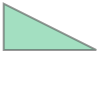

In [28]:
split[1]

Create two polygons, and a new `MultiPolygon` containing them.

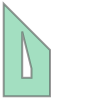

In [30]:
polygon3 = Polygon([(1.0, 1.0), (1.0, 3.0), (2.0, 2.0), (2.0, 1.0)],
                   [[(1.4, 1.4), (1.4, 2.4), (1.6, 1.6), (1.6, 1.4)]])
polygon3

In [31]:
line4_outer = LinearRing([(3.0, 2.0), (3.0, 5.0), (6.0, 5.0), (6.0, 2.0)])

In [32]:
line4_inner1 = LinearRing([(3.5, 2.5), (3.5, 4.5), (4.5, 4.5), (4.5, 2.5)])

In [34]:
line4_inner2 = LinearRing([(5.0, 2.5), (5.0, 4.5), (5.5, 4.5), (5.5, 2.5)])

In [35]:
polygon4 = Polygon(line4_outer, [line4_inner1, line4_inner2])

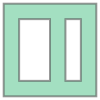

In [36]:
polygon4

In [37]:
multi_polygon = MultiPolygon([polygon3, polygon4])

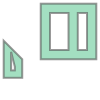

In [38]:
multi_polygon